In [82]:
import pandas as pd

In [83]:
data = pd.read_csv(r"data\insurance.csv")

In [84]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Train-Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = data.drop("charges", axis = 1)
y = data["charges"].copy()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# EDA

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.5+ KB


In [89]:
# null val
X_train.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [90]:
X_train.describe()

,age,bmi,children
count,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477
std,14.073960,6.043386,1.215983
min,18.000000,15.960000,0.000000
25%,27.000000,26.205000,0.000000
50%,39.500000,30.210000,1.000000
75%,51.000000,34.496250,2.000000
max,64.000000,53.130000,5.000000


In [91]:
import matplotlib.pyplot as plt

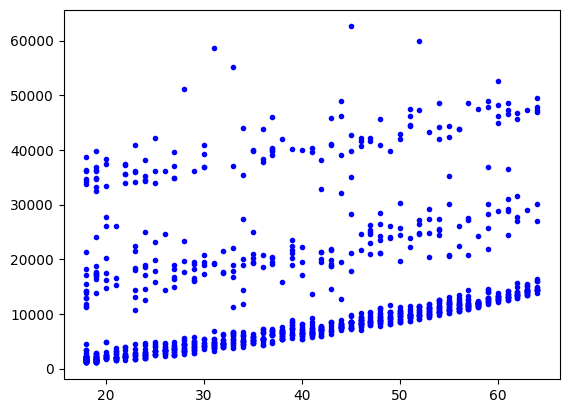

In [92]:
plt.plot(X_train["age"], y_train, "b.")

In [93]:
import seaborn as sns

<Axes: xlabel='age', ylabel='charges'>

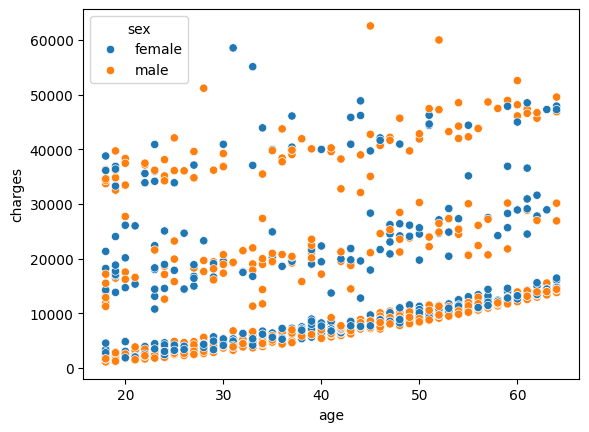

In [94]:
sns.scatterplot(data = X_train, x= "age", y = y_train, hue = "sex")

<Axes: xlabel='age', ylabel='charges'>

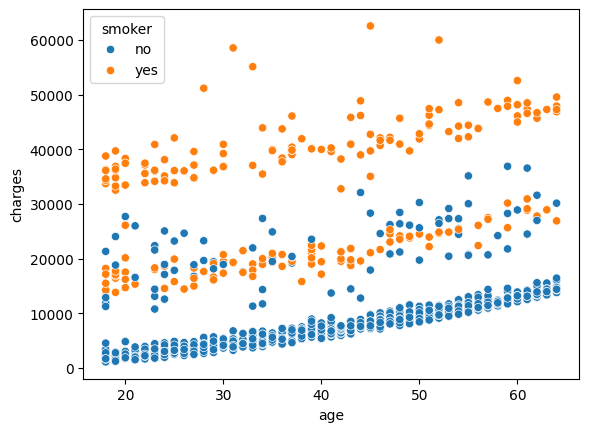

In [95]:
sns.scatterplot(data = X_train, x= "age", y = y_train, hue = "smoker")

<Axes: xlabel='age', ylabel='charges'>

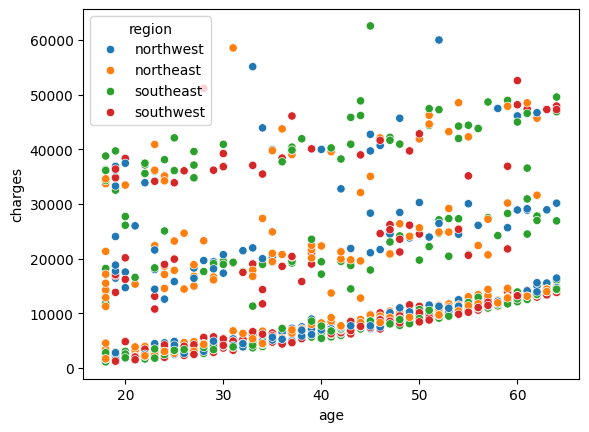

In [96]:
sns.scatterplot(data = X_train, x= "age", y = y_train, hue = "region")

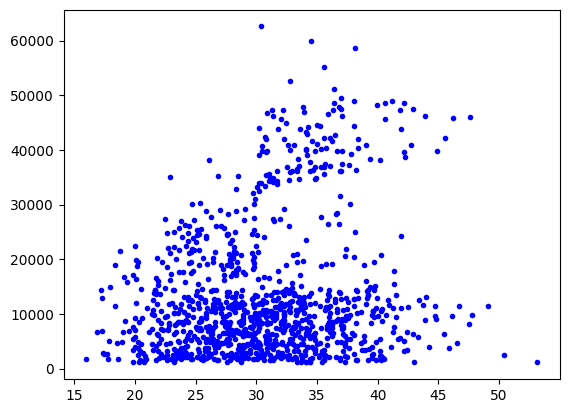

In [97]:
plt.plot(X_train["bmi"], y_train, "b.")

<Axes: xlabel='bmi', ylabel='charges'>

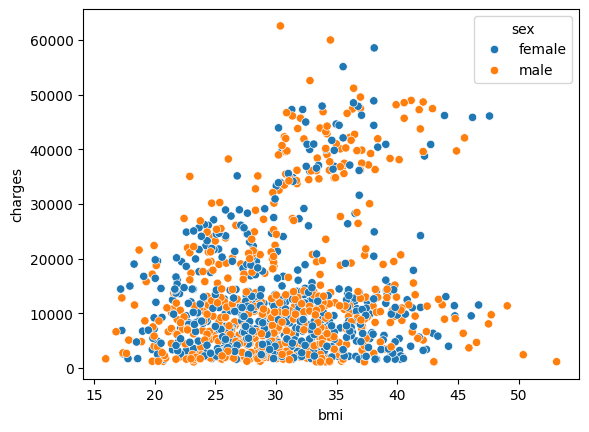

In [98]:
sns.scatterplot(data = X_train, x= "bmi", y = y_train, hue = "sex")

<Axes: xlabel='bmi', ylabel='charges'>

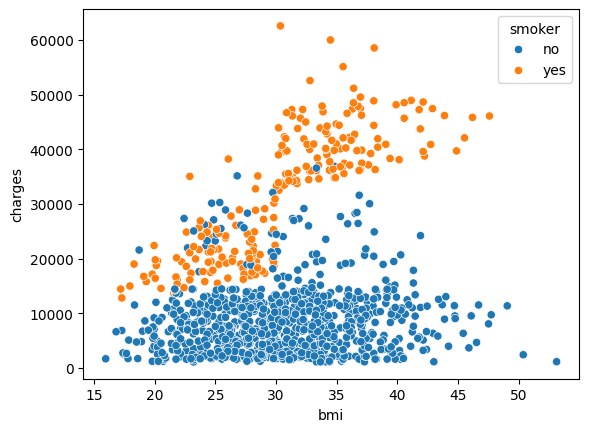

In [99]:
sns.scatterplot(data = X_train, x= "bmi", y = y_train, hue = "smoker")

<Axes: xlabel='bmi', ylabel='charges'>

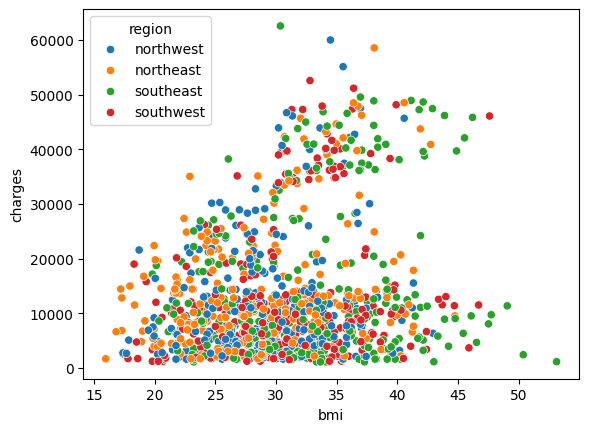

In [100]:
sns.scatterplot(data = X_train, x= "bmi", y = y_train, hue = "region")

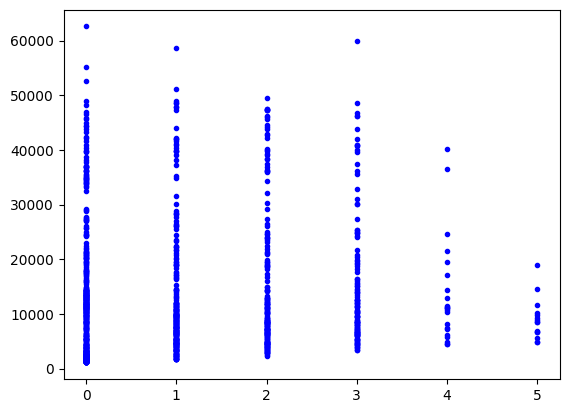

In [101]:
plt.plot(X_train["children"], y_train, "b.") 

In [102]:
X_train["children"].value_counts()

children
0    456
1    259
2    191
3    127
4     22
5     15
Name: count, dtype: int64

In [103]:
X_train["region"].apply(lambda x: "north" if x in ["northwest", "northeast"] else "south")

560     north
1285    north
1142    south
969     south
486     north
        ...  
1095    north
1130    south
1294    north
860     south
1126    south
Name: region, Length: 1070, dtype: object

In [104]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [105]:
X_train_ver1 = X_train.copy()

In [106]:
X_train_ver1["SubRegion"] = X_train["region"].apply(lambda x: "north" if x in ["northwest", "northeast"] else "south")

In [107]:
X_train_ver1.drop("region", axis = 1, inplace= True)

In [108]:
X_train_ver1.head()

,age,sex,bmi,children,smoker,SubRegion
560,46,female,19.95,2,no,north
1285,47,female,24.32,0,no,north
1142,52,female,24.86,0,no,south
969,39,female,34.32,5,no,south
486,54,female,21.47,3,no,north


<Axes: xlabel='age', ylabel='charges'>

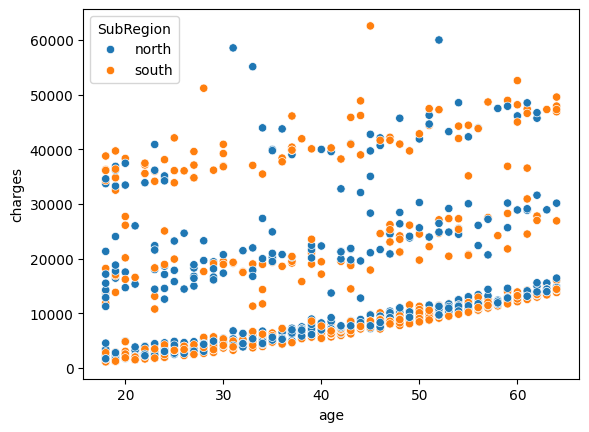

In [109]:
sns.scatterplot(data = X_train_ver1, x= "age", y = y_train, hue = "SubRegion")

<Axes: xlabel='bmi', ylabel='charges'>

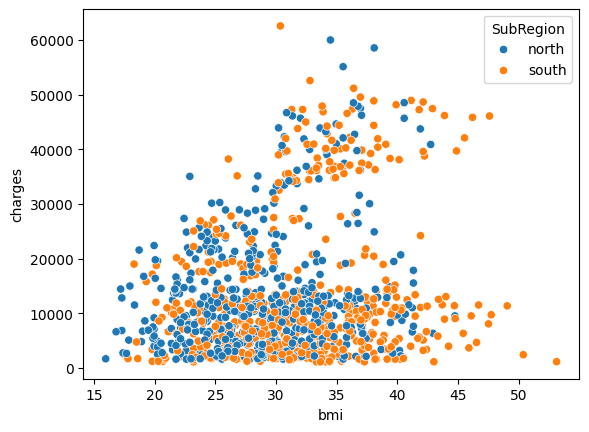

In [110]:
sns.scatterplot(data = X_train_ver1, x= "bmi", y = y_train, hue = "SubRegion")

In [111]:
X_train_ver2 = X_train_ver1.copy()

In [112]:
X_train_ver2["ChildExists"] = X_train_ver2["children"].apply(lambda x:1 if x>1 else 0)

In [113]:
X_train_ver2.head()

,age,sex,bmi,children,smoker,SubRegion,ChildExists
560,46,female,19.95,2,no,north,1
1285,47,female,24.32,0,no,north,0
1142,52,female,24.86,0,no,south,0
969,39,female,34.32,5,no,south,1
486,54,female,21.47,3,no,north,1


In [114]:
X_train_ver2.drop("children", axis = 1, inplace=True)

<Axes: xlabel='age', ylabel='charges'>

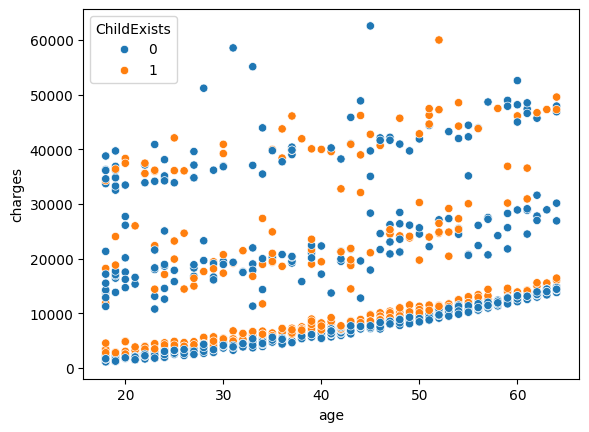

In [115]:
sns.scatterplot(data = X_train_ver2, x= "age", y = y_train, hue = "ChildExists")

<Axes: xlabel='bmi', ylabel='charges'>

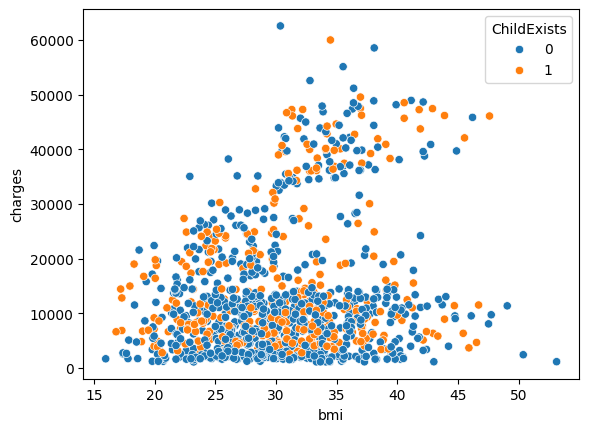

In [116]:
sns.scatterplot(data = X_train_ver2, x= "bmi", y = y_train, hue = "ChildExists")

In [117]:
X_train_ver2["ChildExists"].value_counts()

ChildExists
0    715
1    355
Name: count, dtype: int64

In [118]:
X_train_ver2.head()

,age,sex,bmi,smoker,SubRegion,ChildExists
560,46,female,19.95,no,north,1
1285,47,female,24.32,no,north,0
1142,52,female,24.86,no,south,0
969,39,female,34.32,no,south,1
486,54,female,21.47,no,north,1


In [119]:
X_train_ver2.reset_index(drop=True, inplace=True)

In [120]:
X_train_ver2

,age,sex,bmi,smoker,SubRegion,ChildExists
0,46,female,19.950,no,north,1
1,47,female,24.320,no,north,0
2,52,female,24.860,no,south,0
3,39,female,34.320,no,south,1
4,54,female,21.470,no,north,1
...,...,...,...,...,...,...
1065,18,female,31.350,no,north,1
1066,39,female,23.870,no,south,1
1067,58,male,25.175,no,north,0
1068,37,female,47.600,yes,south,1


In [121]:
# Preparing the data

In [122]:
num_cols = ["age", "bmi"]

In [123]:
cat_cols = ["sex", "smoker", "SubRegion", "ChildExists"]

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
from sklearn.compose import ColumnTransformer

In [126]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
full_pipeline = ColumnTransformer(
    [("num",StandardScaler(), num_cols),
     ("cat", OneHotEncoder(drop = "first"), cat_cols)]
    )


In [128]:
data_lin_reg = full_pipeline.fit_transform(X_train_ver2)

In [129]:
from sklearn.model_selection import cross_val_predict

# Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [131]:
lin_reg.fit(data_lin_reg, y_train)

LinearRegression()

In [132]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(8377.874656002024),
 array([ 3.61630269e+03,  2.03570362e+03, -5.79593956e+00,  2.36223949e+04,
        -5.41056836e+02,  1.17802121e+03]))

In [133]:
pred_lin_reg = cross_val_predict(lin_reg, data_lin_reg, y_train, cv = 3)

In [134]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [135]:
np.sqrt(mean_squared_error(y_train, pred_lin_reg))

np.float64(6164.30778261259)

#### Normal Equation to train Linear Regression Model

In [136]:
data_lin_reg.shape

(1070, 6)

In [137]:
X_b = np.c_[np.ones((1070,1)), data_lin_reg]

In [138]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

In [139]:
theta_best

array([ 8.37787466e+03,  3.61630269e+03,  2.03570362e+03, -5.79593956e+00,
        2.36223949e+04, -5.41056836e+02,  1.17802121e+03])

NOTE: These were our results when training with Linear Regression Class using Scikit Learn:

**(np.float64(8377.874656002024),
 array([ 3.61630269e+03,  2.03570362e+03, -5.79593956e+00,  2.36223949e+04,
        -5.41056836e+02,  1.17802121e+03]))**

# Gradient Descent

### Batch Gradient Descent

In [140]:
eta = 0.1
n_iterations = 1000
m = 1070 #no of instances

In [141]:
X_b.shape

(1070, 7)

In [142]:
theta = np.random.randn(7,1) #random initialization

In [143]:
theta.shape

(7, 1)

In [144]:
y = y_train.values.reshape(-1,1)

In [145]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [146]:
theta

array([[ 8.37787466e+03],
       [ 3.61630269e+03],
       [ 2.03570362e+03],
       [-5.79593957e+00],
       [ 2.36223949e+04],
       [-5.41056836e+02],
       [ 1.17802121e+03]])

### Stochastic Gradient Descent

In [147]:
n_epochs = 50
t0, t1 = 5, 50
m = 1070

In [148]:
def learning_schedule(t):
    return t0/(t + t1)

In [149]:
theta = np.random.randn(7,1)

In [150]:
X_b[0]

array([ 1.        ,  0.47222651, -1.75652513,  0.        ,  0.        ,
        0.        ,  1.        ])

In [151]:
X_b[0:1]

array([[ 1.        ,  0.47222651, -1.75652513,  0.        ,  0.        ,
         0.        ,  1.        ]])

In [152]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [153]:
theta

array([[ 8330.86473038],
       [ 3636.42751363],
       [ 1946.6362596 ],
       [ -121.88386936],
       [23756.27105343],
       [ -544.30931166],
       [ 1123.03678026]])

In [154]:
from sklearn.linear_model import SGDRegressor

In [155]:
sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(data_lin_reg, y_train.ravel())

C:\Users\Hp\AppData\Local\Temp\ipykernel_9572\3071931004.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sgd_reg.fit(data_lin_reg, y_train.ravel())


SGDRegressor(eta0=0.1, penalty=None)

In [156]:
sgd_reg.intercept_, sgd_reg.coef_

(array([7881.9394169]),
 array([ 3917.74596075,  1905.20545822,   269.54313846, 23504.11297276,
         -756.12033326,  1328.58504115]))

# Polynomial Regression

In [157]:
from sklearn.preprocessing import PolynomialFeatures

In [158]:
from sklearn.pipeline import Pipeline

In [159]:
num_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias=False)),
    ("scaler", StandardScaler())
])

In [160]:
full_pipeline_poly = ColumnTransformer(
    [("num", num_pipeline, num_cols),
     ("cat", OneHotEncoder(drop = "first"), cat_cols)]
)

In [161]:
data_poly = full_pipeline_poly.fit_transform(X_train_ver2)

In [162]:
data_poly.shape

(1070, 9)

In [329]:
lin_reg.fit(data_poly, y_train)

LinearRegression()

In [330]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(8210.045035001178),
 array([  104.14310736,  6477.50060935,  4143.01543109,  -749.66731613,
        -4200.4861878 ,    28.37370712, 23618.51304668,  -448.96892863,
         1491.63992294]))

In [163]:
pred_poly = cross_val_predict(lin_reg, data_poly, y_train, cv = 3)

In [164]:
np.sqrt(mean_squared_error(y_train, pred_poly))

np.float64(6123.253062521564)

# Learning Curves

In [165]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "val")

Linear Regression

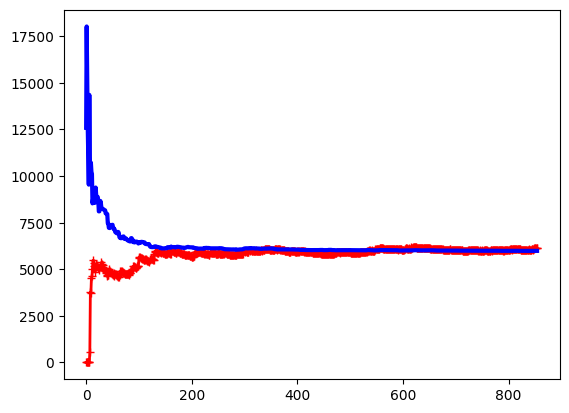

In [166]:
plot_learning_curves(lin_reg, data_lin_reg, y_train)

Polynomial Features

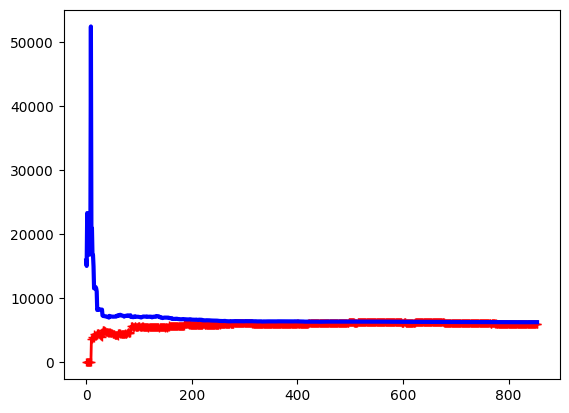

In [167]:
plot_learning_curves(lin_reg, data_poly, y_train)

# Ridge Regression

In [168]:
from sklearn.linear_model import Ridge

In [169]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [170]:
ridge_reg.fit(data_lin_reg, y_train)

Ridge(alpha=1, solver='cholesky')

In [171]:
pred_ridge = cross_val_predict(ridge_reg, data_lin_reg, y_train, cv = 3)

In [172]:
np.sqrt(mean_squared_error(y_train, pred_ridge))

np.float64(6163.5177261320305)

In [173]:
pred_ridge_poly = cross_val_predict(ridge_reg, data_poly, y_train, cv = 3)

In [174]:
np.sqrt(mean_squared_error(y_train, pred_ridge_poly))

np.float64(6122.1942864118755)

**Ridge Using Stochastic Gradient Descent**

In [233]:
sgd_reg_l2 = SGDRegressor(penalty="l2", verbose=1)

In [235]:
sgd_reg_l2.fit(data_poly, y_train)

-- Epoch 1
Norm: 10067.92, NNZs: 9, Bias: 7569.626340, T: 1070, Avg. loss: 53473656.755775
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 13025.39, NNZs: 9, Bias: 7823.571576, T: 2140, Avg. loss: 33751804.269470
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 15222.76, NNZs: 9, Bias: 7994.182731, T: 3210, Avg. loss: 27709718.413539
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 16900.59, NNZs: 9, Bias: 8084.895389, T: 4280, Avg. loss: 24404385.496502
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18152.44, NNZs: 9, Bias: 8164.798735, T: 5350, Avg. loss: 22412272.025598
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 19112.11, NNZs: 9, Bias: 8048.785390, T: 6420, Avg. loss: 21091653.111070
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 19954.76, NNZs: 9, Bias: 8267.837798, T: 7490, Avg. loss: 20372999.736745
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 20554.05, NNZs: 9, Bias: 8158.544365, T: 8560, Avg. loss: 19845500.229944
Total training time: 0.00 s

SGDRegressor(verbose=1)

In [234]:
pred_sgd_l2 = cross_val_predict(sgd_reg_l2, data_poly, y_train, cv = 3)

-- Epoch 1
Norm: 8504.25, NNZs: 9, Bias: 7673.172715, T: 713, Avg. loss: 60701703.406736
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10976.98, NNZs: 9, Bias: 8274.549937, T: 1426, Avg. loss: 38480434.138943
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 12714.62, NNZs: 9, Bias: 8232.651451, T: 2139, Avg. loss: 32545245.419662
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 14251.98, NNZs: 9, Bias: 8280.000084, T: 2852, Avg. loss: 28702018.732033
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 15482.75, NNZs: 9, Bias: 8349.838328, T: 3565, Avg. loss: 26202527.209459
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 16492.72, NNZs: 9, Bias: 8354.111726, T: 4278, Avg. loss: 24466140.394668
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 17332.08, NNZs: 9, Bias: 8305.912914, T: 4991, Avg. loss: 23190709.388338
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 18091.80, NNZs: 9, Bias: 8406.427411, T: 5704, Avg. loss: 22322908.696326
Total training time: 0.00 sec

In [222]:
np.sqrt(mean_squared_error(y_train,pred_sgd_l2))

np.float64(6138.740141117948)

# Lasso Regression

In [178]:
from sklearn.linear_model import Lasso

In [179]:
lasso_reg = Lasso(alpha = 0.1)

In [180]:
pred_lasso_poly = cross_val_predict(lasso_reg, data_poly, y_train, cv = 3)

In [181]:
np.sqrt(mean_squared_error(y_train,pred_lasso_poly))

np.float64(6123.22062531181)

**Lasso Using SGD**

In [216]:
sgd_reg_l1 = SGDRegressor(penalty="l1")

In [217]:
pred_sgd_l1 = cross_val_predict(sgd_reg_l1, data_poly, y_train, cv = 3)

In [218]:
np.sqrt(mean_squared_error(y_train, pred_sgd_l1))

np.float64(6143.660753814423)

# Elastic Net

In [185]:
from sklearn.linear_model import ElasticNet


In [348]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [349]:
pred_elastic = cross_val_predict(elastic_net, data_lin_reg, y_train, cv=3)

In [350]:
np.sqrt(mean_squared_error(y_train, pred_elastic))

np.float64(6540.371457555595)

# Early Stopping

In [250]:
from sklearn.base import clone

In [251]:
X_t, X_v, y_t, y_v = train_test_split(data_poly, y_train, test_size=0.2, random_state=42)

In [252]:
sgd_reg_e = SGDRegressor(max_iter = 1, tol = 0.001, warm_start = True, penalty=None, learning_rate="constant", eta0= 0.0005)

In [253]:
min_val_error = float("inf")

In [254]:
best_epoch = None
best_model = None

In [255]:
for epoch in range(1000):
    sgd_reg_e.fit(X_t, y_t)
    y_val_predict = sgd_reg_e.predict(X_v)
    val_error = mean_squared_error(y_v, y_val_predict)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg_e)

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider incre

In [256]:
pred_early = cross_val_predict(best_model, data_poly, y_train, cv = 3)

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [257]:
np.sqrt(mean_squared_error(y_train, pred_early))

np.float64(12915.044118930376)

# Testing on Test Data

In [260]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [268]:
cat_cols = ["sex", "smoker"]

In [278]:
num_cols = ['age', 'bmi']

In [270]:
trans_cols = ["children", "region"]

In [301]:
children_ix, region_ix = 0, 1

In [262]:
from sklearn.base import BaseEstimator, TransformerMixin

In [264]:
np.array(X_train["region"])

array(['northwest', 'northeast', 'southeast', ..., 'northeast',
       'southwest', 'southwest'], shape=(1070,), dtype=object)

In [265]:
np.array(list(map(lambda x: "north" if x in ["northwest", "northeast"] else "south", np.array(X_train["region"]))))

array(['north', 'north', 'south', ..., 'north', 'south', 'south'],
      shape=(1070,), dtype='<U5')

In [266]:
map(lambda x: "north" if x in ["northwest", "northeast"] else "south", np.array(X_train["region"]))

In [319]:
class AttribTrans(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X = np.array(X)
        SubRegion = np.array(list(map(lambda x: 1 if x in ["northwest", "northeast"] else 0, X[:,region_ix])))
        ChildExists = np.array(list(map(lambda x:1 if x>1 else 0, X[:, children_ix])))
        return np.c_[SubRegion, ChildExists]

In [320]:
attrib_trans = AttribTrans()

In [321]:
X_train[trans_cols].values[:,0]

array([2, 0, 0, ..., 0, 2, 0], shape=(1070,), dtype=object)

In [322]:
trans = attrib_trans.fit_transform(X_train[trans_cols].values)

In [323]:
trans

array([[1, 1],
       [1, 0],
       [0, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 0]], shape=(1070, 2))

In [316]:
num_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias=False)),
    ("scaler", StandardScaler())
])

In [324]:
full_pipeline_test = ColumnTransformer(
    [
        ("num", num_pipeline, num_cols),
        ("trans", AttribTrans(), trans_cols),
        ("cat", OneHotEncoder(drop = "first"), cat_cols),
    ]
)

In [325]:
X_train_transformed = full_pipeline_test.fit_transform(X_train)

In [328]:
X_train_transformed

array([[ 0.47222651, -1.75652513,  0.32786923, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239,  0.41047281, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672,  0.85013703, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925,  1.436356  , ...,  0.        ,
         1.        ,  0.        ],
       [-0.16755139,  2.82086429, -0.33562405, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713,  1.13525262, ...,  0.        ,
         1.        ,  0.        ]], shape=(1070, 9))

In [331]:
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [332]:
lin_reg.intercept_, lin_reg.coef_

(np.float64(7761.076106373194),
 array([  104.14310736,  6477.50060935,  4143.01543109,  -749.66731613,
        -4200.4861878 ,   448.96892863,  1491.63992294,    28.37370712,
        23618.51304668]))

**Transforming Test Data**

In [333]:
X_test_transformed = full_pipeline_test.transform(X_test)

In [363]:
errors = {}

**Polynomial Regression**

In [334]:
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [335]:
poly_pred = lin_reg.predict(X_test_transformed)

In [336]:
np.sqrt(mean_squared_error(y_test, poly_pred))

np.float64(5829.408356102669)

In [364]:
errors["poly_reg"] = np.sqrt(mean_squared_error(y_test, poly_pred))

**Ridge Regression**

In [339]:
ridge_reg.fit(X_train_transformed, y_train)

Ridge(alpha=1, solver='cholesky')

In [340]:
ridge_pred = ridge_reg.predict(X_test_transformed)

In [341]:
np.sqrt(mean_squared_error(y_test, ridge_pred))

np.float64(5821.060672463074)

In [365]:
errors["ridge_reg"] = np.sqrt(mean_squared_error(y_test, ridge_pred))

**Lasso Regression**

In [342]:
lasso_reg.fit(X_train_transformed, y_train)

Lasso(alpha=0.1)

In [343]:
lasso_pred = lasso_reg.predict(X_test_transformed)

In [344]:
np.sqrt(mean_squared_error(y_test, lasso_pred))

np.float64(5829.059643358226)

In [366]:
errors["lasso_reg"] = np.sqrt(mean_squared_error(y_test, lasso_pred))

**Elastic Net**

In [351]:
elastic_net.fit(X_train_transformed, y_train)

ElasticNet(alpha=0.1)

In [352]:
elastic_pred = elastic_net.predict(X_test_transformed)

In [353]:
np.sqrt(mean_squared_error(y_test, elastic_pred))

np.float64(6326.427227976092)

In [367]:
errors["elastic_net"] = np.sqrt(mean_squared_error(y_test, elastic_pred))

**Early Stopping**

In [354]:
X_t, X_v, y_t, y_v = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=42)

In [355]:
sgd_reg_e = SGDRegressor(max_iter = 1, tol = 0.001, warm_start = True, penalty=None, learning_rate="constant", eta0= 0.0005)

In [356]:
min_val_error = float("inf")

In [357]:
best_epoch = None
best_model = None

In [358]:
for epoch in range(1000):
    sgd_reg_e.fit(X_t, y_t)
    y_val_predict = sgd_reg_e.predict(X_v)
    val_error = mean_squared_error(y_v, y_val_predict)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg_e)

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider incre

In [360]:
best_model.fit(X_train_transformed, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             warm_start=True)

In [361]:
early_pred = best_model.predict(X_test_transformed)

In [362]:
np.sqrt(mean_squared_error(y_test, early_pred))

np.float64(11679.120436909063)

In [368]:
errors["early_stopping"] = np.sqrt(mean_squared_error(y_test, early_pred))

# Comparison

Text(0, 0.5, 'RMSE')

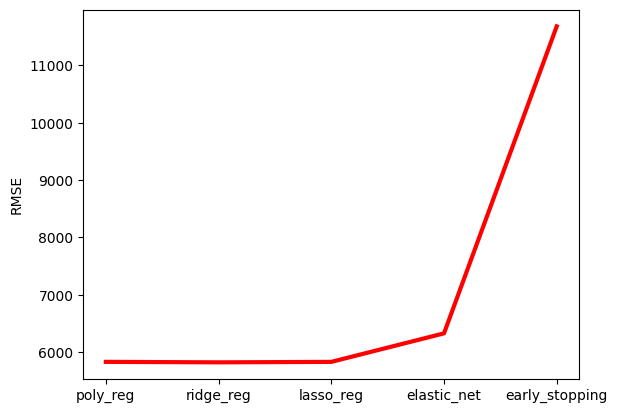

In [374]:
plt.plot(errors.keys(), errors.values(),"r", linewidth = 3)
plt.ylabel("RMSE")